3. Let x(t) = rect(t), where t is measured in seconds. That is, x(t) = 1 for t ∈ [−0.5, 0.5], and 0 otherwise. This signal is sampled at the following rates and then reconstructed as $\hat{x}$(t) using a corresponding sinc reconstruction filter:

(a) fs = 1 Hz

(b) fs = 10 Hz

(c) fs = 100 Hz

Plot the reconstructed output $\hat{x}$(t) for each case above, and compute the sum squared error $ \int_{-∞}^{∞} |x(t) − $\hat{x}(t)$|^{2}\,dt $ in each case (you can approximate this using the numpy.trapz function). What is your observation? Explain

Sum square error for fs = 1Hz Hz : 0.23446816777967003
Sum square error for fs = 10Hz Hz : 0.23446816777967003
Sum square error for fs = 100Hz Hz : 0.23446816777967003


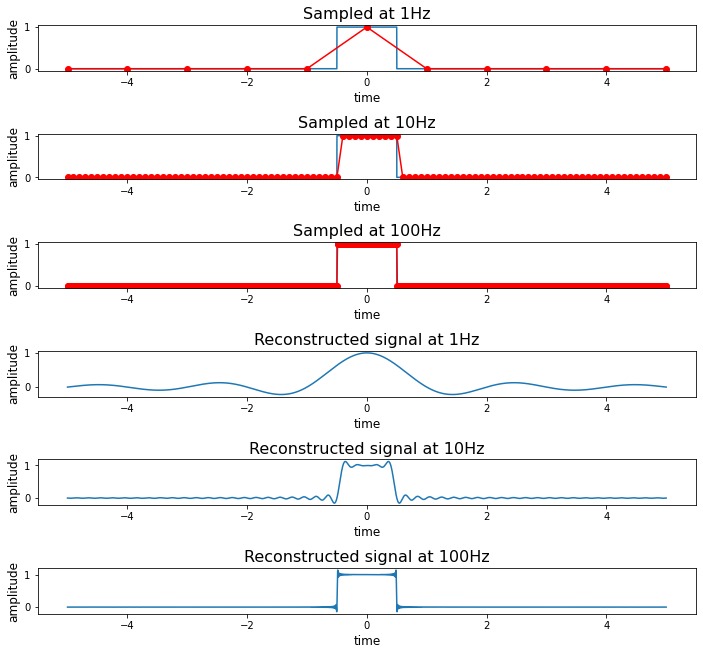

In [ ]:
import numpy as np
#from numpy import linspace,cos,pi,ceil,floor,arange
import matplotlib.pyplot as plt
def rect(t):  # defining rectangular signal
    y=[0]*len(t)
    for i in range(len(t)):
        if abs(t[i]) <= 0.5:
            y[i] = 1
        else:
            y[i] = 0
    return y 
def sampled(fs,n):
  x = rect(n)  # defining sampled signal
  return x
def recon(n,T,t):  # deinining reconstructed signal
  samples = len(n)
  #xsamp=np.zeros(n.shape)
  xrecon=0
  x = rect(t)
  for k in range(-samples,samples):
   if k*T <0.5 and k*T >-0.5:
      xrecon+= np.sinc((t-k*T)/T)
   else:
     xrecon+=0
  return xrecon
 
fs1=1
T1 = 1/fs1
t1=np.arange(-5,5,0.001)
n1=np.arange(-5,5+T1,T1)
x1 = rect(t1)
xsamp1 = sampled(fs1,n1)
x1reconstructed = recon(n1,T1,t1)
 
fs2=10
T2 = 1/fs2
t2=np.arange(-5,5,0.001)
n2=np.arange(-5,5+T2,T2)
x2 = rect(t2)
xsamp2 = sampled(fs2,n2)
x2reconstructed = recon(n2,T2,t2)
 
fs3=100
T3 = 1/fs3
t3=np.arange(-5,5,0.001)
n3=np.arange(-5,5+T3,T3)
x3 = rect(t3)
xsamp3 = sampled(fs3,n3)
x3reconstructed = recon(n3,T3,t3)
 
error1 = np.trapz(np.power(abs(x1-x1reconstructed),2),t1)
print("Sum square error for fs = 1Hz Hz :",error1)
error2 = np.trapz(np.power(abs(x2-x2reconstructed),2),t2)
print("Sum square error for fs = 10Hz Hz :",error1)
error3 = np.trapz(np.power(abs(x3-x3reconstructed),2),t3)
print("Sum square error for fs = 100Hz Hz :",error1)
figure = plt.figure(figsize=(10,10))
plt.subplot(6,1,1)
plt.plot(t1,x1,label='Continuous Input Signal')
plt.plot(n1, xsamp1,'-or',label='Sampled Signal')
plt.xlabel("time",fontsize="12")
plt.ylabel("amplitude",fontsize="12")
plt.title("Sampled at 1Hz",fontsize="16")
 
plt.subplot(6,1,2)
plt.plot(t2,x2,label='Continuous Input Signal')
plt.plot(n2, xsamp2,'-or',label='Sampled Signal')
plt.xlabel("time",fontsize="12")
plt.ylabel("amplitude",fontsize="12")
plt.title("Sampled at 10Hz",fontsize="16")
 
plt.subplot(6,1,3)
plt.plot(t3,x3,label='Continuous Input Signal')
plt.plot(n3, xsamp3,'-or',label='Sampled Signal')
plt.xlabel("time",fontsize="12")
plt.ylabel("amplitude",fontsize="12")
plt.title("Sampled at 100Hz",fontsize="16")
 
plt.subplot(6,1,4)
plt.plot(t1,x1reconstructed,label='Continuous Input Signal')
plt.xlabel("time",fontsize="12")
plt.ylabel("amplitude",fontsize="12")
plt.title("Reconstructed signal at 1Hz",fontsize="16")
 
plt.subplot(6,1,5)
plt.plot(t2,x2reconstructed,label='Continuous Input Signal')
 
plt.xlabel("time",fontsize="12")
plt.ylabel("amplitude",fontsize="12")
plt.title("Reconstructed signal at 10Hz",fontsize="16")
 
plt.subplot(6,1,6)
plt.plot(t3,x3reconstructed,label='Continuous Input Signal')
 
plt.xlabel("time",fontsize="12")
plt.ylabel("amplitude",fontsize="12")
plt.title("Reconstructed signal at 100Hz",fontsize="16")
 
 
figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()